In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from matplotlib import pyplot as plt 

%matplotlib inline

In [3]:
# Set random Seed
np.random.seed(28)

#### Uncompress Dataset File

In [4]:
if not os.path.exists('./fer2013'):
    import tarfile
    try:
        file = tarfile.open('./fer2013.tar.gz', mode='r:gz')
        try: 
            file.extractall()
        finally: 
            file.close()
    except FileNotFoundError:
        print('File Not Found')
    else:
        file.close()

In [5]:
DATASET = os.path.join('fer2013', 'fer2013.csv')

In [6]:
EMOTION_MAP = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6:'Neutral'}

In [7]:
df = pd.read_csv(DATASET)

In [8]:
df.columns

Index(['emotion', 'pixels', 'Usage'], dtype='object')

In [9]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


###  Read and Show the first Image in the Dataset

In [10]:
img = np.fromstring(df.pixels[0], dtype=np.uint8, sep=' ')

In [11]:
img = img.reshape(48, 48)

In [12]:
from functools import partial

In [13]:
text_annotation = partial(plt.text, x=36, y=46, fontdict={'color': 'red', 'fontsize': 10, 'ha': 'center', 
                                                          'va': 'center', 
                                                          'bbox': dict(boxstyle="round", fc="white", 
                                                                       ec="black", pad=0.2)})

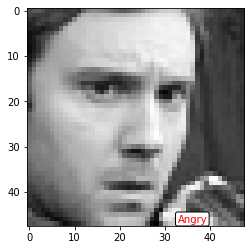

In [14]:
plt.imshow(img, cmap=plt.gray())
text_annotation(s=EMOTION_MAP[df.emotion[0]])
plt.show()

In [15]:
def plot_gallery(samples, title, cmap=plt.cm.gray, image_shape=(48, 48)):
    """"""
    n_row, n_col = len(samples) // 4, 4
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, (em_label, bytestring) in enumerate(samples):
        plt.subplot(n_row, n_col, i + 1)
        comp = np.fromstring(bytestring, dtype=np.uint8, sep=' ')
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='bilinear',
                   vmin=-vmax, vmax=vmax)
        text_annotation(s='{}-{}'.format(str(i+1).zfill(2), em_label))
        plt.xticks(())
        plt.yticks(())

In [16]:
SAMPLE_SIZE = 100
samples = np.random.choice(np.arange(df.shape[0]), size=SAMPLE_SIZE, replace=False)
samples = [(EMOTION_MAP[df.emotion[idx]], df.pixels[idx]) for idx in samples]

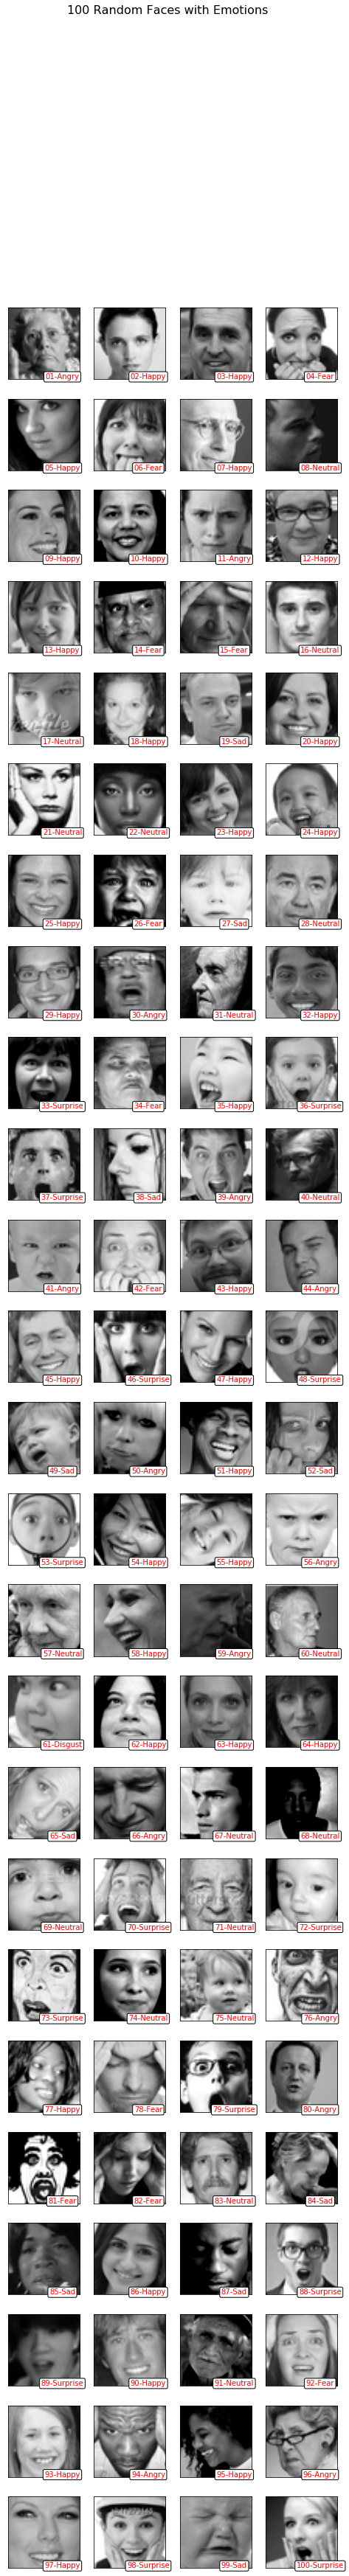

In [17]:
plot_gallery(samples, title='{} Random Faces with Emotions'.format(SAMPLE_SIZE))

##  `Count` Statistics by emotion

In [18]:
df.shape

(35887, 3)

In [19]:
df_count = df.groupby('emotion').count()
df_count['Emotion Label'] = [EMOTION_MAP[i] for i in df_count.index.values]

In [20]:
df_count

,pixels,Usage,Emotion Label
emotion,,,
0,4953,4953,Angry
1,547,547,Disgust
2,5121,5121,Fear
3,8989,8989,Happy
4,6077,6077,Sad
5,4002,4002,Surprise
6,6198,6198,Neutral


### Statistics per Dataset (Training, Validation, Test)

In [21]:
df.columns

Index(['emotion', 'pixels', 'Usage'], dtype='object')

In [22]:
df.Usage.value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [23]:
df['data-set'] = df.Usage.apply(lambda v: 'training' if v == 'Training' else 'validation' if v == 'PrivateTest' else 'test')

In [24]:
data_sets = df['data-set'].unique()

In [25]:
data_sets

array(['training', 'test', 'validation'], dtype=object)

In [26]:
data_sets_count = {}
for name_set in data_sets:
    emo_count = df[df['data-set'] == name_set].emotion.value_counts()
    emotions_count = pd.Series(emo_count.values, index=list(map(lambda v: EMOTION_MAP[v], emo_count.index.values)))
    data_sets_count[name_set] = emotions_count

In [27]:
for name_set, emo_count in data_sets_count.items():
    print(f'{name_set}\n')
    print(emo_count)
    print('\n\n')

training

Happy       7215
Neutral     4965
Sad         4830
Fear        4097
Angry       3995
Surprise    3171
Disgust      436
dtype: int64



test

Happy       895
Sad         653
Neutral     607
Fear        496
Angry       467
Surprise    415
Disgust      56
dtype: int64



validation

Happy       879
Neutral     626
Sad         594
Fear        528
Angry       491
Surprise    416
Disgust      55
dtype: int64





## Select Random Samples for each emotion

`20 sample images per emotion`

In [28]:
random_samples = {}

for em_id, em_label in EMOTION_MAP.items():
    em_samples = df[df.emotion == em_id]
    em_rnd_samples_idx = np.random.choice(np.arange(em_samples.shape[0]), size=20, replace=False)
    em_rnd_samples = [(em_samples.iloc[idx]['emotion'], em_samples.iloc[idx]['pixels'])
                      for idx in em_rnd_samples_idx]
    random_samples[em_id] = em_rnd_samples
    

In [29]:
# CrossCheck
for em_id in random_samples:
    s = set(e[0] for e in random_samples[em_id])
    print(em_id, s)

0 {0}
1 {1}
2 {2}
3 {3}
4 {4}
5 {5}
6 {6}


#### Save Random images 


	 angry_01 saved!
	 angry_02 saved!
	 angry_03 saved!
	 angry_04 saved!
	 angry_05 saved!
	 angry_06 saved!
	 angry_07 saved!
	 angry_08 saved!
	 angry_09 saved!
	 angry_10 saved!
	 angry_11 saved!
	 angry_12 saved!
	 angry_13 saved!
	 angry_14 saved!
	 angry_15 saved!
	 angry_16 saved!
	 angry_17 saved!
	 angry_18 saved!
	 angry_19 saved!
	 angry_20 saved!
Angry Done! 

	 disgust_01 saved!
	 disgust_02 saved!
	 disgust_03 saved!
	 disgust_04 saved!
	 disgust_05 saved!
	 disgust_06 saved!
	 disgust_07 saved!
	 disgust_08 saved!
	 disgust_09 saved!
	 disgust_10 saved!
	 disgust_11 saved!
	 disgust_12 saved!
	 disgust_13 saved!
	 disgust_14 saved!
	 disgust_15 saved!
	 disgust_16 saved!
	 disgust_17 saved!
	 disgust_18 saved!
	 disgust_19 saved!
	 disgust_20 saved!
Disgust Done! 

	 fear_01 saved!
	 fear_02 saved!
	 fear_03 saved!
	 fear_04 saved!
	 fear_05 saved!
	 fear_06 saved!
	 fear_07 saved!
	 fear_08 saved!
	 fear_09 saved!
	 fear_10 saved!
	 fear_11 saved!
	 fear_12 saved!
	 fear

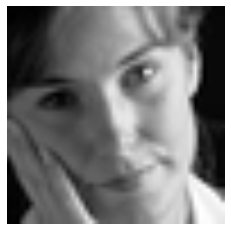

In [30]:
# makedir
SAVE_FOLDER = os.path.join(os.path.abspath(os.path.curdir), 'extracted_random_samples')
os.makedirs(SAVE_FOLDER, exist_ok=True)

for em_id, em_label in EMOTION_MAP.items():
    em_folder_path = os.path.join(SAVE_FOLDER, em_label.lower())
    os.makedirs(em_folder_path, exist_ok=True)
    
    fname_tmplt = '{em_label}_{count}'
    
    for c, (em_id, em_pixel) in enumerate(random_samples[em_id]):
        fname = fname_tmplt.format(em_label=em_label.lower(), count=str(c+1).zfill(2))
        fimage_path = os.path.join(em_folder_path, fname)
        img_arr = np.fromstring(em_pixel, dtype=np.uint8, sep=' ').reshape(48, 48)
        img = plt.imshow(img_arr, interpolation='bilinear')
        plt.axis('off')
        plt.savefig(fimage_path)
        print('\t {} saved!'.format(fname))
    
    print('{} Done! \n'.format(em_label))